In [52]:
import pandas as pd
import numpy as np
%matplotlib inline

### Agenda
- Corona analysis
    - melt, pivot_table, join, merge
- Random variable
- Correlation analysis
    - Correlation matrix
    - Heatmap to visualize correlation matrix
    - Identify top correlated variables in a data frame
- Cosine similarity
- Structured data
- Unstructured text data -> Structured data - Document Term Matrix
- Word similarity
- Document similarity
- Populate custom functions in a python file and import it in jupyter notebook
- Exercises

In [7]:
url = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url)
cols_retain = ['Province/State', 'Country/Region', 'Lat', 'Long']
df_confirmed = confirmed.melt(id_vars=cols_retain)
df_confirmed = df_confirmed.rename(columns={'variable': 'Date',
                                            'value': 'confirmed'})
df_confirmed['Date'] = pd.to_datetime(df_confirmed['Date'],
                                  format="%m/%d/%y")

In [21]:
# Identify top 10 countries with maximum cases as on yesterday
australia = df_confirmed[df_confirmed['Country/Region']=='Australia']

In [47]:

sample = pd.DataFrame({
    'product': ['a', 'b', 'c', 'a', 'b'],
    'Date': ['M', 'M',' M', 'T', 'T'],
    'sales': [1,2,3,4,5]
})
summary = sample.groupby(['product', 'Date']).agg({'sales': sum})
#summary.reset_index()

In [57]:
country_confirmed = df_confirmed.groupby(
    ['Country/Region', 'Date']).agg({'confirmed': sum})
country_confirmed = country_confirmed.reset_index()
#australia = country_confirmed[country_confirmed['Country/Region']=='Australia']
#australia['confirmed_abs'] = australia['confirmed'].diff()
#australia.plot.line(x='Date', y='confirmed_abs')

In [66]:
country_counts = country_confirmed.groupby(['Country/Region']).agg({'confirmed': 'last'})

In [65]:
latest_date = country_confirmed['Date'].max()
country_counts = country_confirmed[country_confirmed['Date'] == latest_date]

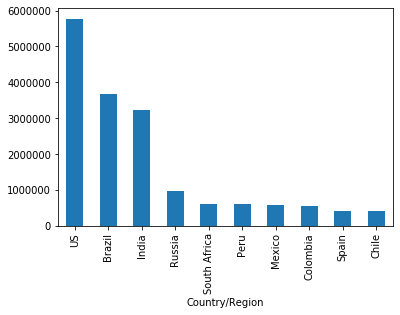

In [70]:
top_countries = country_counts.sort_values(by='confirmed',
                                           ascending=False).head(10)

top_countries['confirmed'].plot.bar()

In [83]:
def wrangle_data(url, entity_name):
    confirmed = pd.read_csv(url)
    cols_retain = ['Province/State', 'Country/Region', 'Lat', 'Long']
    df_confirmed = confirmed.melt(id_vars=cols_retain)
    df_confirmed = df_confirmed.rename(columns={'variable': 'Date',
                                                'value': entity_name})
    df_confirmed['Date'] = pd.to_datetime(df_confirmed['Date'],
                                      format="%m/%d/%y")
    country_confirmed = df_confirmed.groupby(
        ['Country/Region', 'Date']).agg({entity_name: sum})
    country_confirmed = country_confirmed.reset_index()
    return country_confirmed

In [89]:
url = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = wrangle_data(url, 'confirmed')

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
deaths = wrangle_data(url, 'deaths')

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recovered = wrangle_data(url, 'recovered')

In [95]:
# merge/join

In [110]:
# Merge
corona = pd.merge(left=confirmed,
                  right=deaths,
                 left_on=['Country/Region', 'Date'],
                 right_on=['Country/Region', 'Date'],
                 how='left')
corona = pd.merge(left=corona,
                  right=recovered,
                 on=['Country/Region', 'Date'],
                 how='left')
corona.head()

,Country/Region,Date,confirmed,deaths,recovered
0,Afghanistan,2020-01-22,0,0,0
1,Afghanistan,2020-01-23,0,0,0
2,Afghanistan,2020-01-24,0,0,0
3,Afghanistan,2020-01-25,0,0,0
4,Afghanistan,2020-01-26,0,0,0


In [118]:
# join
confirmed_new = confirmed.set_index(['Country/Region', 'Date'])
deaths_new = deaths.set_index(['Country/Region', 'Date'])
recovered_new = recovered.set_index(['Country/Region', 'Date'])

corona = confirmed_new.join([
    deaths_new,
    recovered_new], how='left')
corona = corona.reset_index()

In [121]:
com_cols = ['Country/Region', 'Date']
corona = confirmed.set_index(com_cols).join([
    deaths.set_index(com_cols),
    recovered.set_index(com_cols)], how='left')
corona = corona.reset_index()

In [126]:
sample1 = pd.DataFrame({
    'product': ['a', 'b', 'c', 'd', 'e'],
    'chennai': [1,2,3,4,5]
})

sample2 = pd.DataFrame({
    'product': ['a', 'b', 'd', 'e', 'f'],
    'bangalore': [1,2,3,4,5]
})

sample1.set_index(['product']).join(sample2.set_index(['product']), how='outer')

,chennai,bangalore
product,,
a,1.0,1.0
b,2.0,2.0
c,3.0,NaN
d,4.0,3.0
e,5.0,4.0
f,NaN,5.0
